In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the dfset
df=pd.read_csv("/content/Superstore sales.csv")

In [5]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3294,3295,CA-2014-138023,15/8/2014,18/8/2014,First Class,KH-16510,Keith Herrera,Consumer,United States,Dallas,...,75081,Central,OFF-BI-10003638,Office Supplies,Binders,GBC Durable Plastic Covers,30.96,8,0.80,-52.6320
8287,8288,CA-2014-156244,12/8/2014,16/8/2014,Standard Class,DH-13675,Duane Huffman,Home Office,United States,Miami,...,33180,South,OFF-AR-10004344,Office Supplies,Art,Bulldog Vacuum Base Pencil Sharpener,47.96,5,0.20,4.1965
2122,2123,CA-2017-167381,22/9/2017,24/9/2017,Second Class,EH-14005,Erica Hernandez,Home Office,United States,Lansing,...,48911,Central,FUR-BO-10001972,Furniture,Bookcases,O'Sullivan 4-Shelf Bookcase in Odessa Pine,241.96,2,0.00,41.1332
231,232,US-2017-100930,7/4/2017,12/4/2017,Standard Class,CS-12400,Christopher Schild,Home Office,United States,Tampa,...,33614,South,FUR-TA-10001705,Furniture,Tables,Bush Advantage Collection Round Conference Table,233.86,2,0.45,-102.0480
1283,1284,CA-2017-122154,9/4/2017,11/4/2017,First Class,SA-20830,Sue Ann Reed,Consumer,United States,Jacksonville,...,32216,South,OFF-PA-10000994,Office Supplies,Paper,Xerox 1915,251.64,3,0.20,88.0740


In [6]:
df.shape

(9994, 21)

In [7]:
## Anlaysing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df.isna().sum()# We don't have any null values

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [10]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format='%d/%m/%Y', errors='coerce')
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format='%d/%m/%Y', errors='coerce')
df["order_month"] = df["Order Date"].dt.month_name()
df["order_year"] = df["Order Date"].dt.year
df["Ship_month"] = df["Ship Date"].dt.month_name()
df["Ship_year"] = df["Ship Date"].dt.year

In [11]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_month,order_year,Ship_month,Ship_year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,November,2016,November,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,November,2016,November,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,June,2016,June,2016


SALES ANALYSIS

In [12]:
monthly_sales=df.groupby("order_month")["Sales"].sum().sort_values(ascending=False).reset_index()

In [13]:
  monthly_sales

,order_month,Sales
0,November,352461.0710
1,December,325293.5035
2,September,307649.9457
3,March,205005.4888
4,October,200322.9847
5,August,159044.0630
6,May,155028.8117
7,June,152718.6793
8,July,147238.0970
9,April,137762.1286


Generate Charts Corresponding to Monthly Sales

In [14]:
px.line(monthly_sales,x="order_month",y="Sales",title="Monthly Sales")

YEARLY SALES

<Axes: xlabel='order_year', ylabel='Sales'>

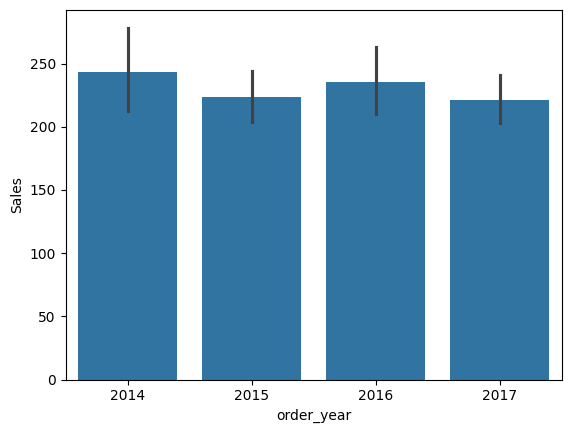

In [15]:
Yearly_Sales=df.groupby("order_year")["Sales"].sum().sort_values(ascending=False)
sns.barplot(x="order_year",y="Sales",data=df)

CATEGORY SALES

In [16]:
Category_Sales=df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
Category_Sales

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


In [17]:
px.pie(values=Category_Sales,names=Category_Sales.index,title="Category Sales")

SUB CATEGORY SALES

In [18]:
sub_category_sales=df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)
sub_category_sales

,Sales
Sub-Category,
Phones,330007.0540
Chairs,328449.1030
Storage,223843.6080
Tables,206965.5320
Binders,203412.7330
Machines,189238.6310
Accessories,167380.3180
Copiers,149528.0300
Bookcases,114879.9963


In [19]:
px.bar(x=sub_category_sales.index,y=sub_category_sales,title="Sub Category Sales")

PROFIT ANALYSIS


In [20]:
monthly_profit=df.groupby("order_month")["Profit"].sum().sort_values(ascending=False)
monthly_profit

,Profit
order_month,
December,43369.1919
September,36857.4753
November,35468.4265
October,31784.0413
March,28594.6872
May,22411.3078
August,21776.9384
June,21285.7954
July,13832.6648


In [21]:
px.line(monthly_profit,x=monthly_profit.index,y="Profit",title="Monthly Profit")

Annual Profit

In [22]:
annual_profit=df.groupby("order_year")["Profit"].sum().sort_values(ascending=False)
annual_profit

,Profit
order_year,
2017,93439.2696
2016,81795.1743
2015,61618.6037
2014,49543.9741


<Axes: title={'center': 'Annual Profit'}, xlabel='order_year', ylabel='Profit'>

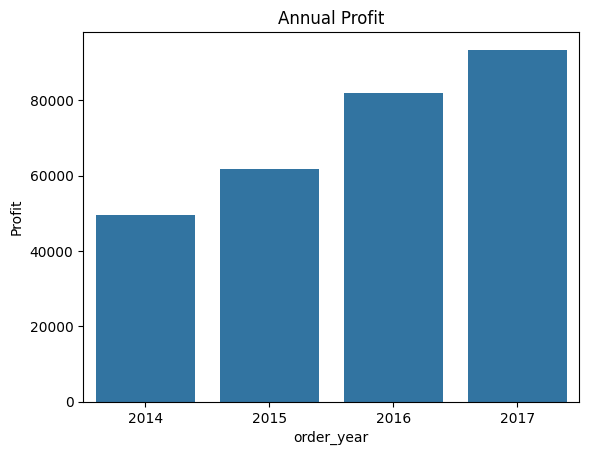

In [23]:
plt.title("Annual Profit")
sns.barplot(x=annual_profit.index,y=annual_profit)

Category PROFIT


In [24]:
category_profit=df.groupby("Category")["Profit"].sum().sort_values(ascending=False)

In [25]:
px.pie(values=category_profit,names=category_profit.index,title="Category Profit")

In [26]:
sub_category_profit=df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False)
sub_category_profit

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


In [27]:
px.line(sub_category_profit,x=sub_category_profit.index,y="Profit",title="Sub Category Profit")

Sales Profit Comparision wrt Segment

In [28]:
segment = df.groupby("Segment")[["Sales","Profit"]].sum()

In [30]:
segment

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


Text(0, 0.5, 'Sales,Profit')

<Figure size 1200x600 with 0 Axes>

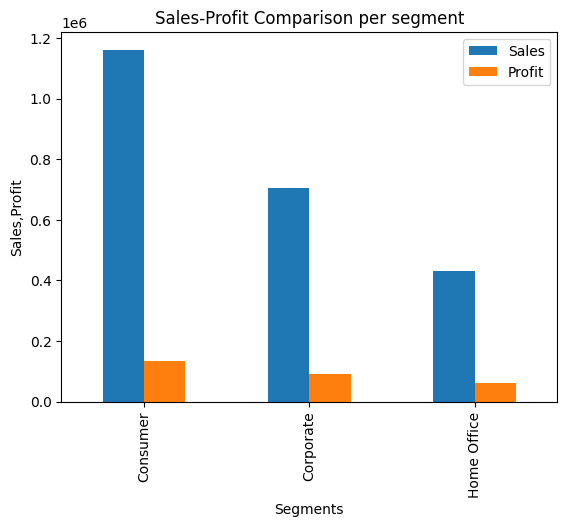

In [32]:
plt.figure(figsize=(12, 6))
segment.plot(kind='bar')
plt.title("Sales-Profit Comparison per segment")
plt.xlabel("Segments")
plt.ylabel("Sales,Profit")

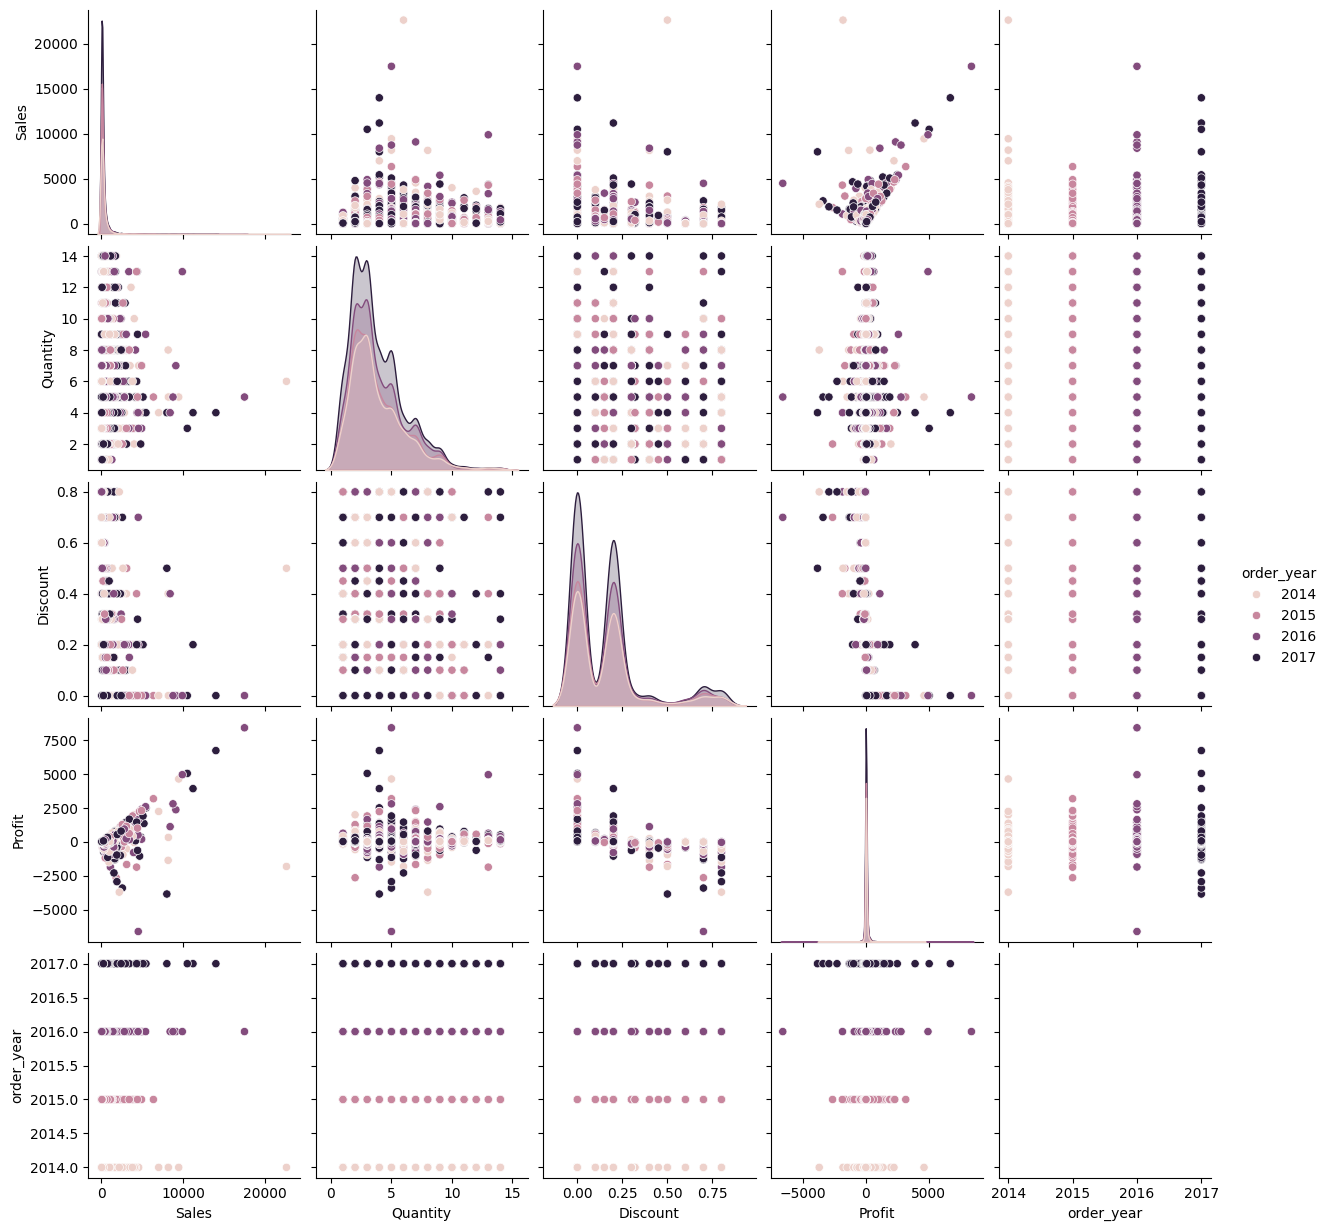

In [34]:
sns.pairplot(df,vars=['Sales', 'Quantity', 'Discount', 'Profit','order_year'], hue='order_year')

In [37]:
numerical_cols=df.select_dtypes(include=['int64','float64','int32']).columns
numerical_cols

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'order_year', 'Ship_year'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [38]:
categorical_col=df.select_dtypes(include=['object']).columns
categorical_col

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'order_month', 'Ship_month'],
      dtype='object')

In [42]:
columns = df[['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
columns.head(5)

,Row ID,Sales,Quantity,Discount,Profit
0,1,261.9600,2,0.00,41.9136
1,2,731.9400,3,0.00,219.5820
2,3,14.6200,2,0.00,6.8714
3,4,957.5775,5,0.45,-383.0310
4,5,22.3680,2,0.20,2.5164


In [43]:
columns.shape

(9994, 5)

CORRELATION MATRIX

In [48]:
Corr_matrix=df[numerical_cols].corr()
Corr_matrix

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,order_year,Ship_year
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497,0.015430,0.015773
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,0.004299,0.005024
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064,-0.009679,-0.010815
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253,-0.005810,-0.006716
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487,-0.002662,-0.002279
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000,0.004670,0.004531
order_year,0.015430,0.004299,-0.009679,-0.005810,-0.002662,0.004670,1.000000,0.994083
Ship_year,0.015773,0.005024,-0.010815,-0.006716,-0.002279,0.004531,0.994083,1.000000


<Axes: >

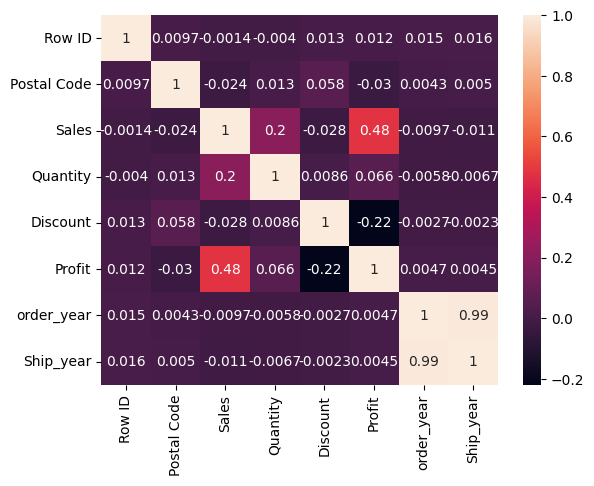

In [49]:
sns.heatmap(Corr_matrix,annot=True)

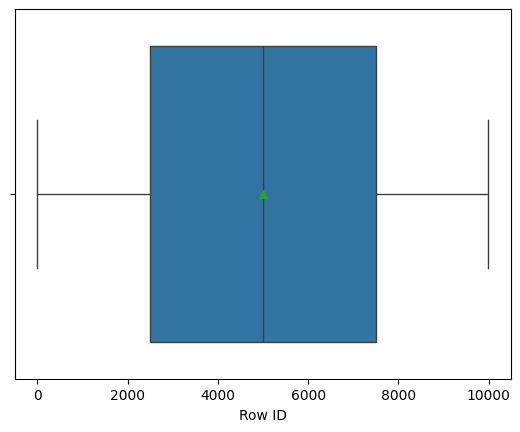

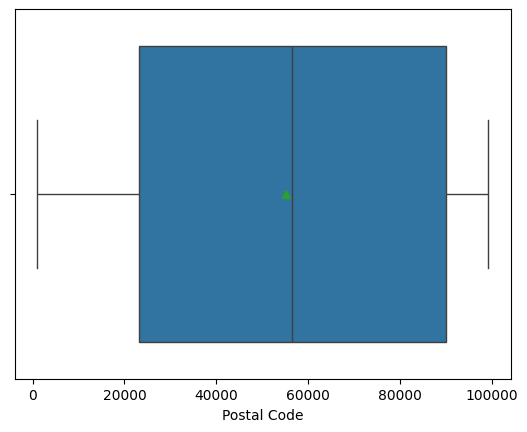

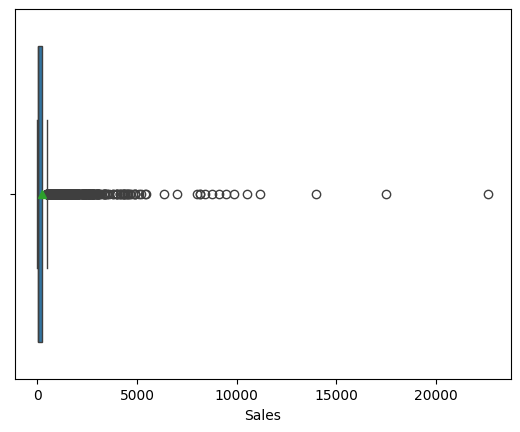

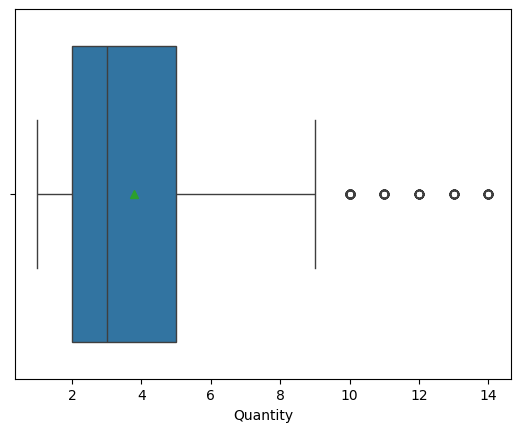

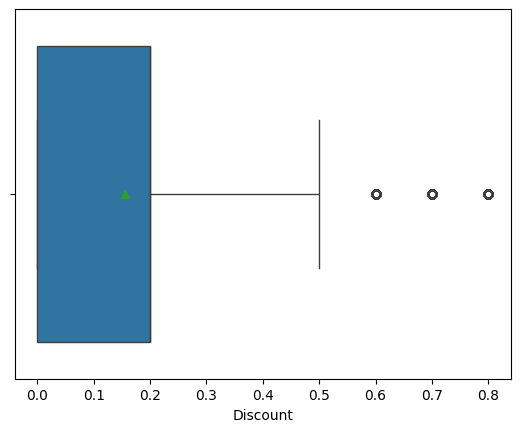

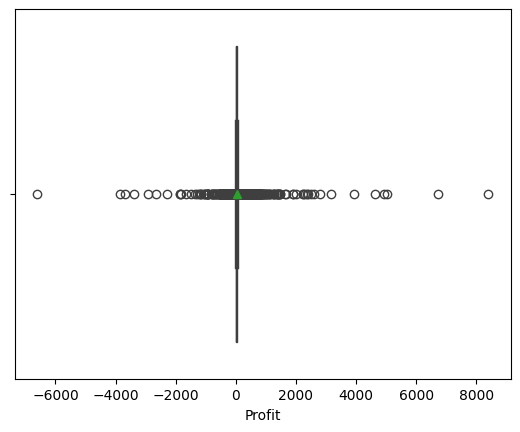

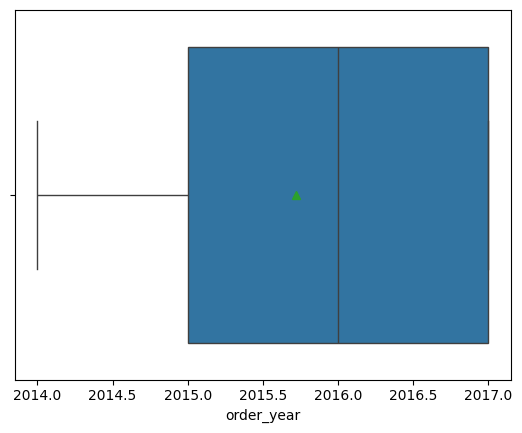

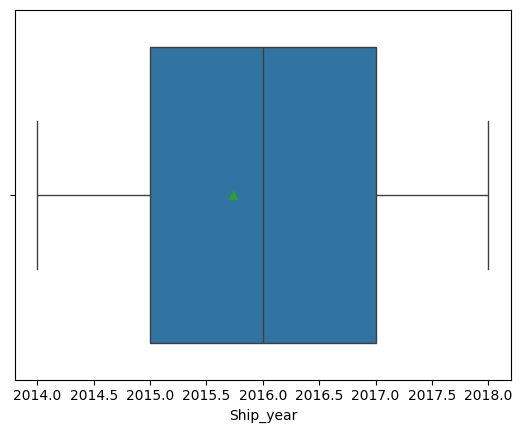

In [58]:
# Using Box-Plot to find outliers if any in the Numerical Columns
Numerical=df[numerical_cols]
for col in Numerical.columns:
  sns.boxplot(x=df[col],showmeans=True)

  plt.show()

In [61]:
# Using exponential method to reduce outliers
exp = df[[ 'Sales', 'Quantity', 'Discount', 'Profit']]
np.exp(exp['Sales'])

,Sales
0,5.858447e+113
1,inf
2,2.235555e+06
3,inf
4,5.179633e+09
...,...
9989,9.227139e+10
9990,8.664042e+39
9991,1.986689e+112
9992,7.163358e+12


In [63]:
exp

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


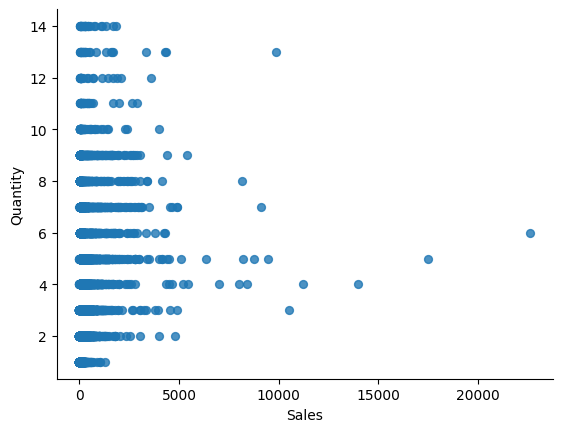

In [64]:
# @title Sales vs Quantity

from matplotlib import pyplot as plt
exp.plot(kind='scatter', x='Sales', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)